**Informe del Análisis de Calidad de Datos:**

Documentar en formato markdown los resultados del análisis de calidad de los datos, identificando problemas encontrados (como valores faltantes o inconsistencias) y detallando las soluciones implementadas para garantizar la confiabilidad del análisis posterior.

Descripción de los datos:
                  id  cash_request_id             type    status  \
count   21061.000000     21057.000000            21061     21061   
unique           NaN              NaN                3         4   
top              NaN              NaN  instant_payment  accepted   
freq             NaN              NaN            11099     14841   
mean    10645.355111     16318.449162              NaN       NaN   
min         1.000000      1456.000000              NaN       NaN   
25%      5385.000000     11745.000000              NaN       NaN   
50%     10652.000000     17160.000000              NaN       NaN   
75%     15925.000000     21796.000000              NaN       NaN   
max     21193.000000     27010.000000              NaN       NaN   
std      6099.315256      6656.149949              NaN       NaN   

                     category  total_amount                 reason  \
count                    2196  21061.000000                  21061   
unique           

/var/folders/5j/6t2j9zls237_klqhdt5ljdgr0000gn/T/ipykernel_79538/2856637202.py:18: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['cohort'] = df['created_at'].dt.to_period('M')
/var/folders/5j/6t2j9zls237_klqhdt5ljdgr0000gn/T/ipykernel_79538/2856637202.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', order=df['type'].value_counts().index, palette='viridis')


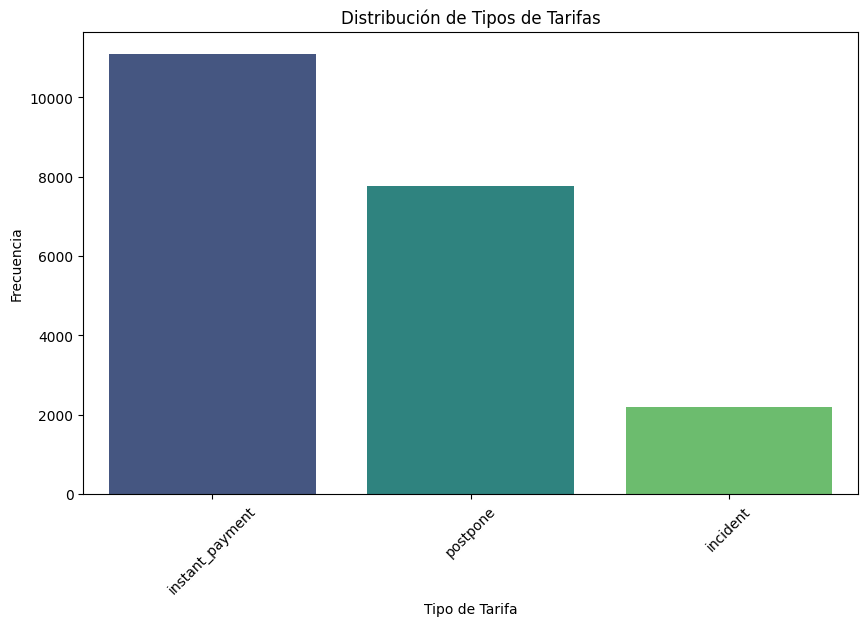

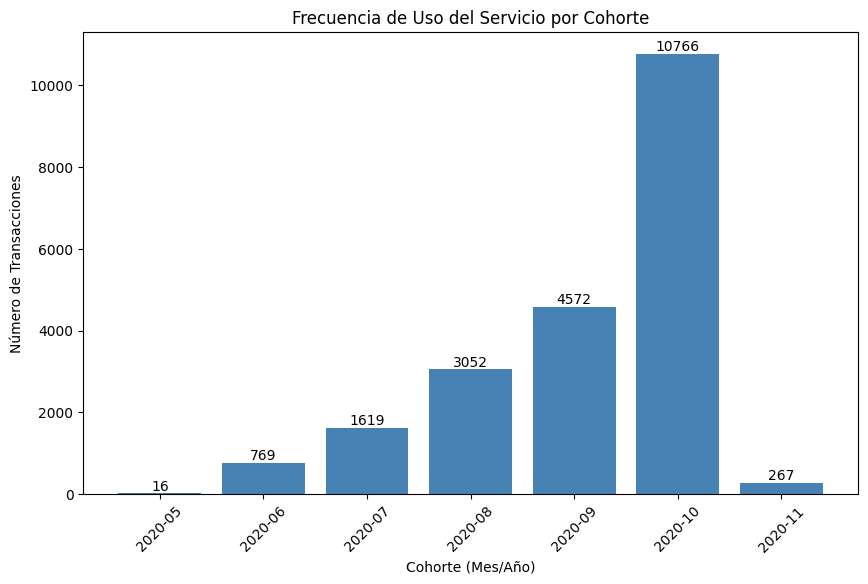

posx and posy should be finite values
posx and posy should be finite values


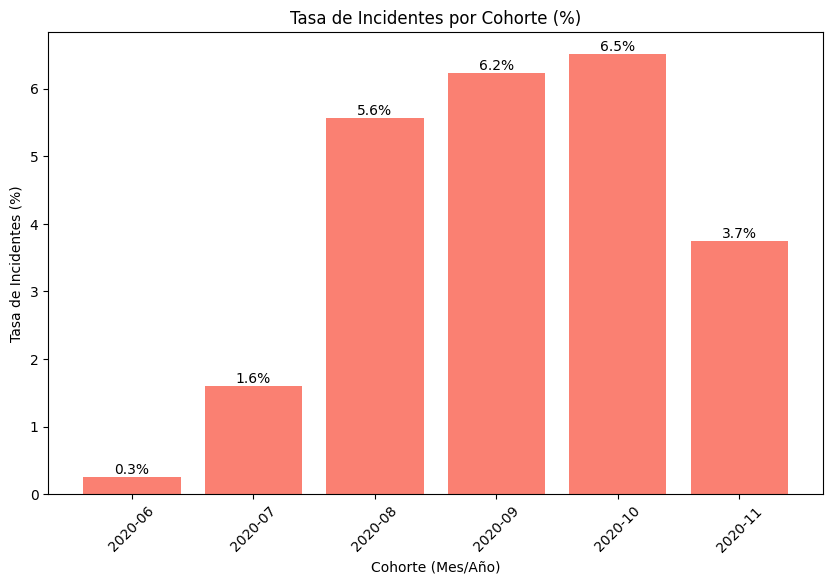

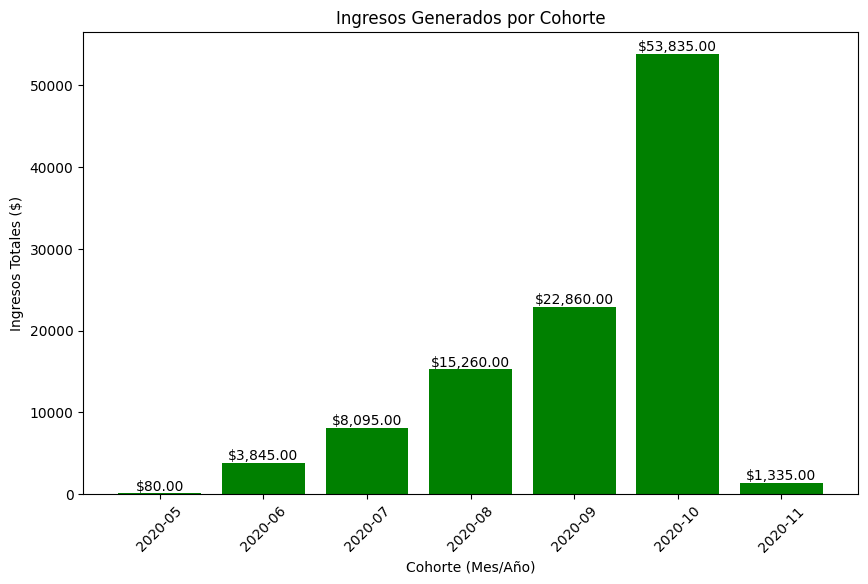

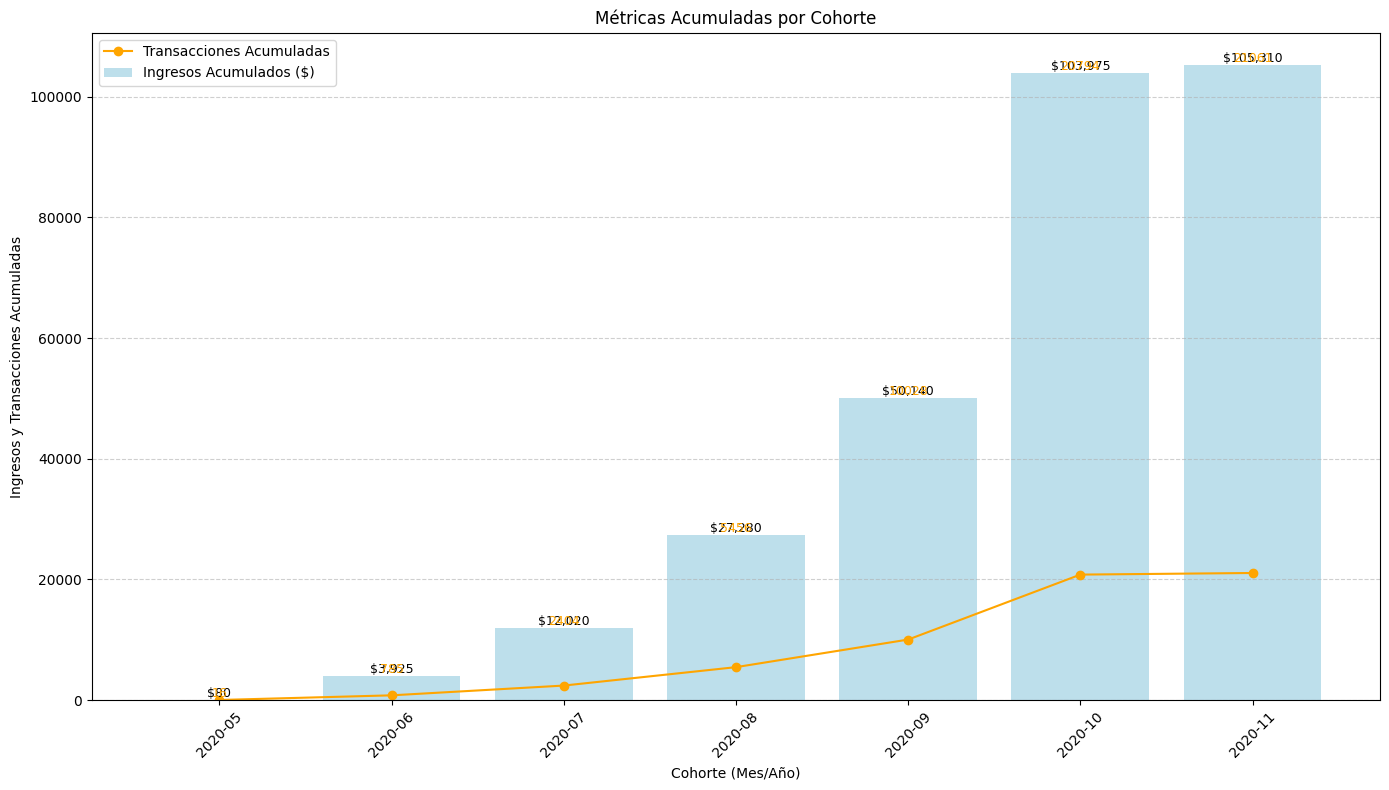


INSIGHTS RELEVANTES:
- Cohorte con mayor frecuencia de uso: 2020-10 (10766 transacciones)
- Cohorte con mayor tasa de incidentes: 2020-10 (6.51%)
- Cohorte con mayores ingresos: 2020-10 ($53,835.00)
- Total de ingresos acumulados: $105,310.00


In [172]:
%run '01-EDA-fees.ipynb'

1. **Integridad**  
   - Evaluación: ¿Qué proporción de las entidades tienen datos completos?  
   - Métrica: Número de valores faltantes detectados.  

Calidad de los datos:
             Column  Non_Null_Count  Non_Null_Percentage  Null_Count  \
4          category            2196            10.426855       18865   
11          to_date            6512            30.919709       14549   
10        from_date            6749            32.045012       14312   
9           paid_at           15438            73.301363        5623   
1   cash_request_id           21057            99.981008           4   
0                id           21061           100.000000           0   
2              type           21061           100.000000           0   
3            status           21061           100.000000           0   
5      total_amount           21061           100.000000           0   
6            reason           21061           100.000000           0   
7        created_at           21061           100.000000           0   
8        updated_at           21061           100.000000           0   
12    charge_moment           21061       

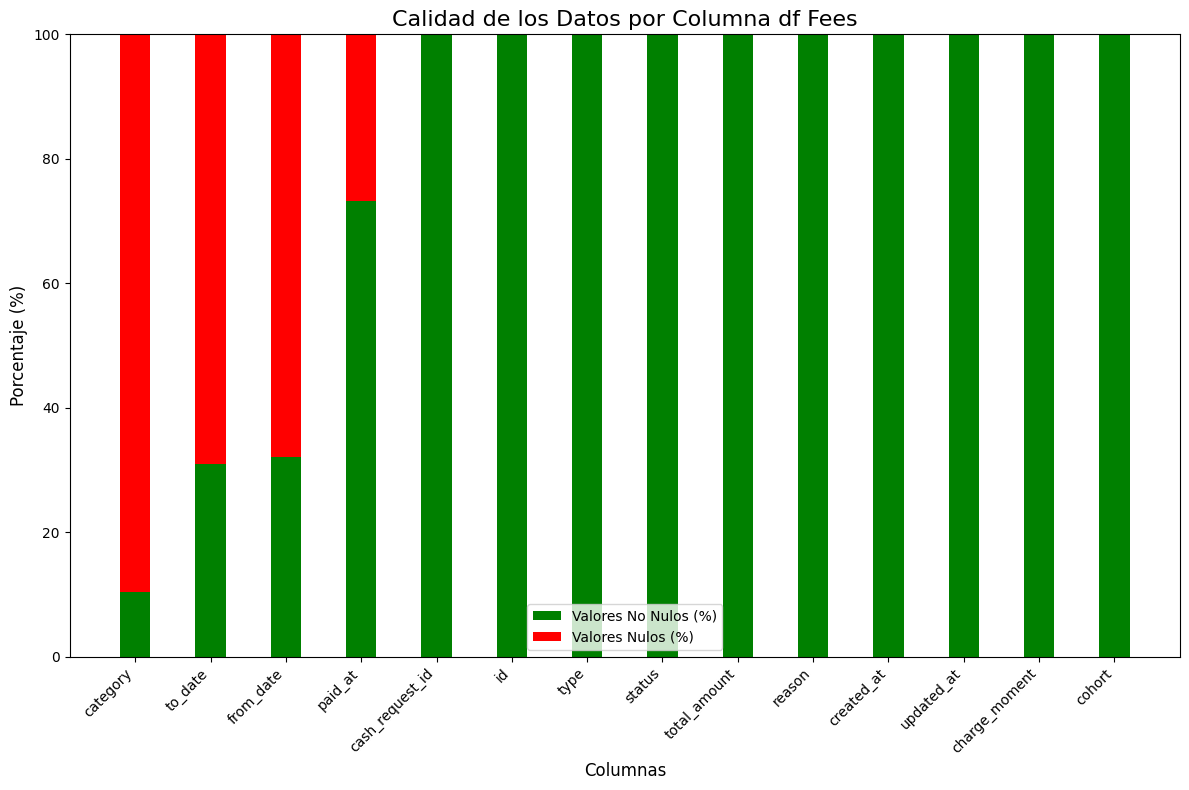

In [173]:
# Control de datos/calidad
df_fees = df.copy()
# Contar de valores no nulos y nulos
total_rows = len(df_fees)
null_counts = df.isnull().sum()
non_null_counts = total_rows - null_counts

# Crear DataFrame resumen con información de valores correctos y nulos
data_quality_summary = pd.DataFrame({
    'Column': df_fees.columns,
    'Non_Null_Count': non_null_counts.values,
    'Non_Null_Percentage': (non_null_counts.values / total_rows) * 100,
    'Null_Count': null_counts.values,
    'Null_Percentage': (null_counts.values / total_rows) * 100
}).sort_values(by='Null_Count', ascending=False)

# Muestro el resumen en una tabla
print("Calidad de los datos:")
print(data_quality_summary)

# Exporto a un archivo CSV (opcional)
#output_path = "data_quality_summary.csv"
#data_quality_summary.to_csv(output_path, index=False)

# Gráfico para visualizar la calidad de los datos
plt.figure(figsize=(12, 8))

# Agrupar barras de valores nulos y no nulos
width = 0.4
x = range(len(data_quality_summary))

plt.bar(x, data_quality_summary['Non_Null_Percentage'], width, label='Valores No Nulos (%)', color='green')
plt.bar(x, data_quality_summary['Null_Percentage'], width, bottom=data_quality_summary['Non_Null_Percentage'], label='Valores Nulos (%)', color='red')

plt.title("Calidad de los Datos por Columna df Fees", fontsize=16)
plt.xlabel("Columnas", fontsize=12)
plt.ylabel("Porcentaje (%)", fontsize=12)
plt.xticks(x, data_quality_summary['Column'], rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()

2. **Consistencia**  
   - Evaluación: ¿Qué tan consistentes son los datos en las diferentes tablas?  
   - Métrica: Número de inconsistencias encontradas en los datos.

In [174]:
df_fees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   id               21061 non-null  int64              
 1   cash_request_id  21057 non-null  float64            
 2   type             21061 non-null  object             
 3   status           21061 non-null  object             
 4   category         2196 non-null   object             
 5   total_amount     21061 non-null  float64            
 6   reason           21061 non-null  object             
 7   created_at       21061 non-null  datetime64[ns, UTC]
 8   updated_at       21061 non-null  datetime64[ns, UTC]
 9   paid_at          15438 non-null  datetime64[ns, UTC]
 10  from_date        6749 non-null   datetime64[ns, UTC]
 11  to_date          6512 non-null   datetime64[ns, UTC]
 12  charge_moment    21061 non-null  object             
 13  cohort          

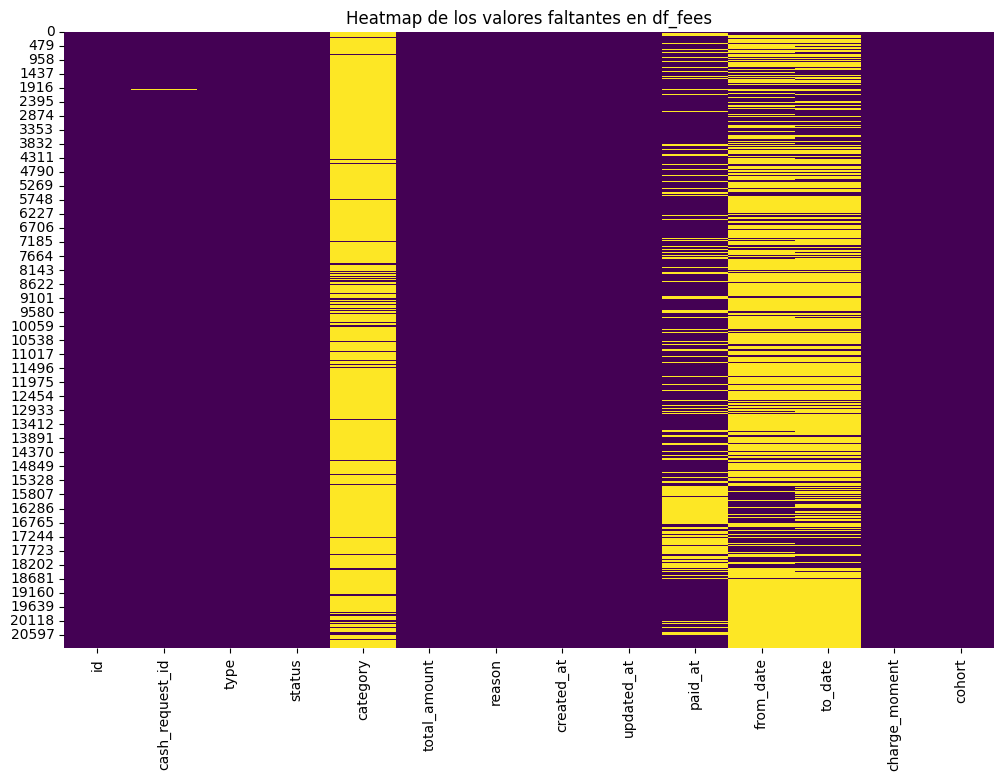

In [175]:
# Heatmap de valores faltantes
plt.figure(figsize=(12, 8))
sns.heatmap(df_fees.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap de los valores faltantes en df_fees")
plt.show()

Observaciones de la data:

Según la descripción de los datos proporcionada, podemos comenzar analizando sistemáticamente los valores faltantes y sus relaciones. Procedamos paso a paso.

Columna: category

Valores únicos: ['rejected_direct_debit', 'month_delay_on_paid', NaN].
Esta columna tiene un alto porcentaje de valores faltantes (solo 2196 no nulos de 21 061 filas).
Nota: Con solo dos valores únicos no nulos, esta columna se puede clasificar en categorías binarias o nominales.

Columna: paid_at

Las estadísticas resumidas muestran que los datos oscilan entre el 23 de junio de 2020 y el 12 de febrero de 2021.
Falta: ~26% de los datos.

Columna: from_date y to_date

from_date tiene 6.749 entradas no nulas, mientras que to_date tiene 6.512.
Ambos representan intervalos de tiempo, con from_date anterior a to_date.
Los valores faltantes pueden ser imputables utilizando patrones temporales.

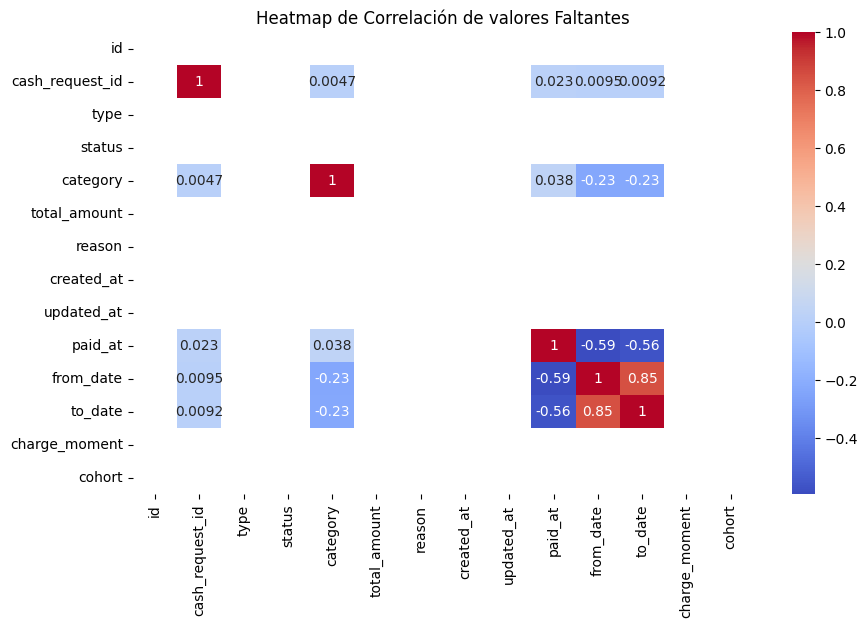

In [176]:
# Binary DataFrame para valores faltantes
missing_binary = df_fees.isnull().astype(int)

# Correlacion de faltantes
missing_corr = missing_binary.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(missing_corr, annot=True, cmap="coolwarm")
plt.title("Heatmap de Correlación de valores Faltantes")
plt.show()


Los valores faltantes de from_date, to_date y paid_at están altamente correlacionados (~0,85 entre from_date y to_date, ~0,59 conpaid_at), lo que indica que cuando falta uno de estos, es probable que también falten otros.

Información procesable: esta fuerte relación sugiere una dependencia temporal, y podemos considerar imputar estas columnas de forma conjunta utilizando modelos de interpolación o regresión.

3. **Relevancia / Auditabilidad**  
   - Evaluación: ¿Qué tan relevantes son los datos proporcionados para las entidades analizadas?  
   - Métrica: Número de valores irrelevantes o no auditables.  

In [177]:
# Relevancia y auditabilidad en Fees para la columna status y total amount
irrelevant_status_fees = df_fees[~df_fees['status'].isin(['rejected', 'accepted', 'cancelled', 'confirmed'])] if 'status' in df_fees.columns else None
negative_amounts_fees = df_fees[df_fees['total_amount'] < 0] if 'total_amount' in df_fees.columns else None

# Métrica
relevance_auditability = {
    "Fees Irrelevant Status Count": len(irrelevant_status_fees) if irrelevant_status_fees is not None else 0,
    "Fees Negative Amount Count": len(negative_amounts_fees) if negative_amounts_fees is not None else 0,
}

print("Relevancia y Auditabilidad:", relevance_auditability)


Relevancia y Auditabilidad: {'Fees Irrelevant Status Count': 0, 'Fees Negative Amount Count': 0}


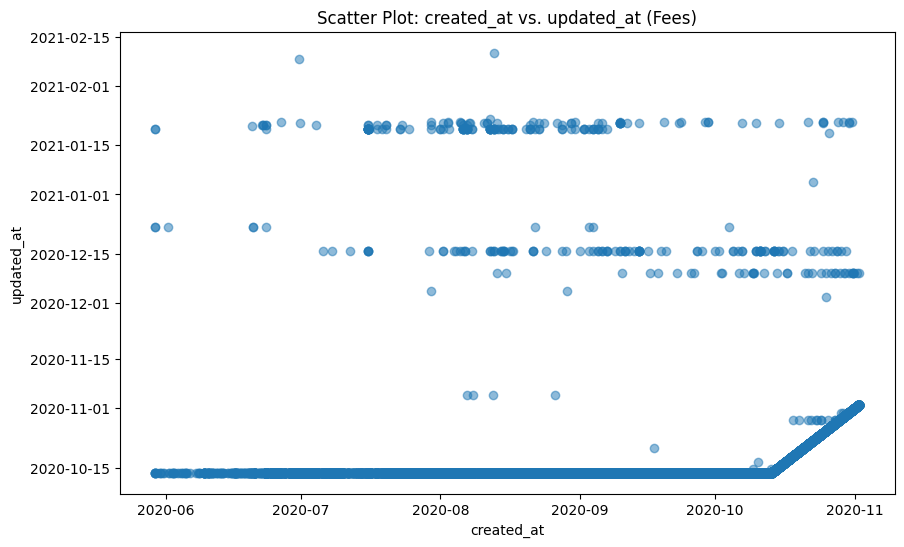

In [178]:
#scatter plot para la relevancia entre created_at y updated_at

if 'created_at' in df_fees.columns and 'updated_at' in df_fees.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(df_fees['created_at'], df_fees['updated_at'], alpha=0.5)
    plt.title("Scatter Plot: created_at vs. updated_at (Fees)")
    plt.xlabel("created_at")
    plt.ylabel("updated_at")
    plt.show()


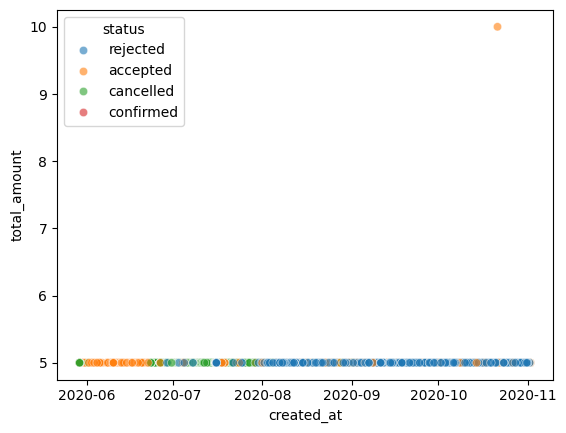

In [179]:
#scatter plot para la relevancia entre created_at y total amount, coloreado por status
if 'created_at' in df_fees.columns and 'total_amount' in df_fees.columns:
    sns.scatterplot(data=df_fees, x='created_at', y='total_amount', hue='status', alpha=0.6)



In [180]:
# Cross-tabulation con 'category' y 'reason'
print(pd.crosstab(df_fees['category'], df_fees['reason']))

reason                  month delay on payment - 10/2020  \
category                                                   
month_delay_on_payment                               102   
rejected_direct_debit                                  0   

reason                  month delay on payment - 11/2020  \
category                                                   
month_delay_on_payment                                 5   
rejected_direct_debit                                  0   

reason                  month delay on payment - 7/2020  \
category                                                  
month_delay_on_payment                                4   
rejected_direct_debit                                 0   

reason                  month delay on payment - 8/2020  \
category                                                  
month_delay_on_payment                              203   
rejected_direct_debit                                 0   

reason                  month delay on payme

In [181]:
# Cross-tabulation con 'type' y 'category'
print(pd.crosstab(df_fees['category'], df_fees['type']))

type                    incident
category                        
month_delay_on_payment       597
rejected_direct_debit       1599


In [210]:
print(df_fees['category'].unique())
print(df_fees['reason'].unique())
print(df_fees['type'].unique())


['rejected_direct_debit' 'month_delay_on_payment']
['Instant Payment Cash Request' 'rejected direct debit'
 'Postpone Cash Request' 'month delay on payment - 10/'
 'month delay on payment - 9/' 'month delay on payment - 8/'
 'month delay on payment - 11/' 'month delay on payment - 7/']
['instant_payment' 'incident' 'postpone']


<Axes: xlabel='category'>

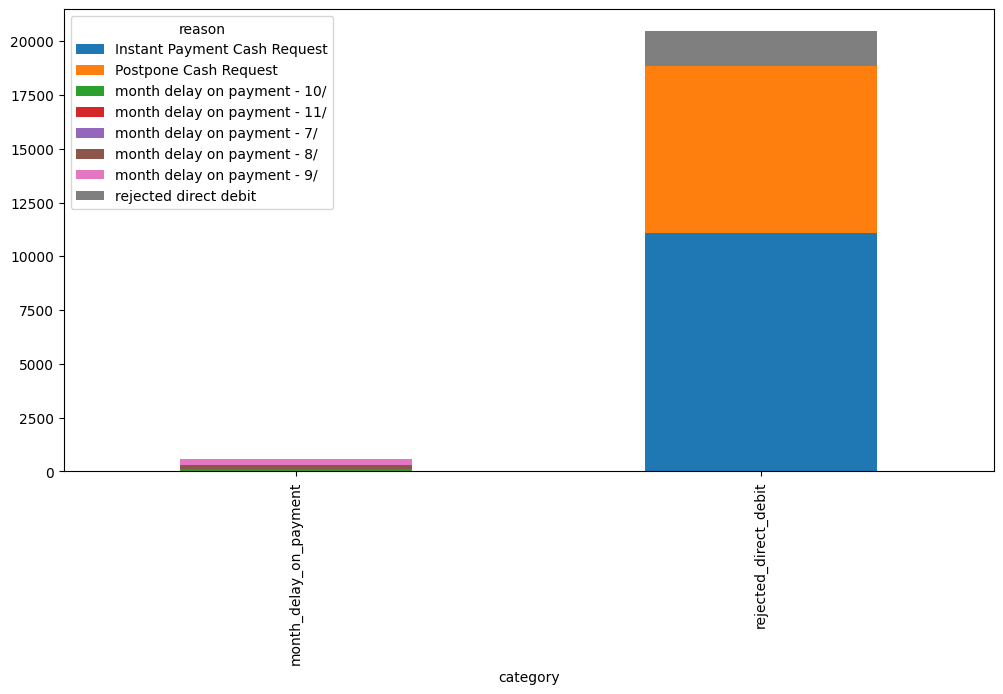

In [211]:
df_fees.groupby(['category', 'reason']).size().unstack().plot(kind='bar', stacked=True, figsize=(12, 6))


/var/folders/5j/6t2j9zls237_klqhdt5ljdgr0000gn/T/ipykernel_79538/3093207934.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_fees['month_year'] = df_fees['created_at'].dt.to_period('M')


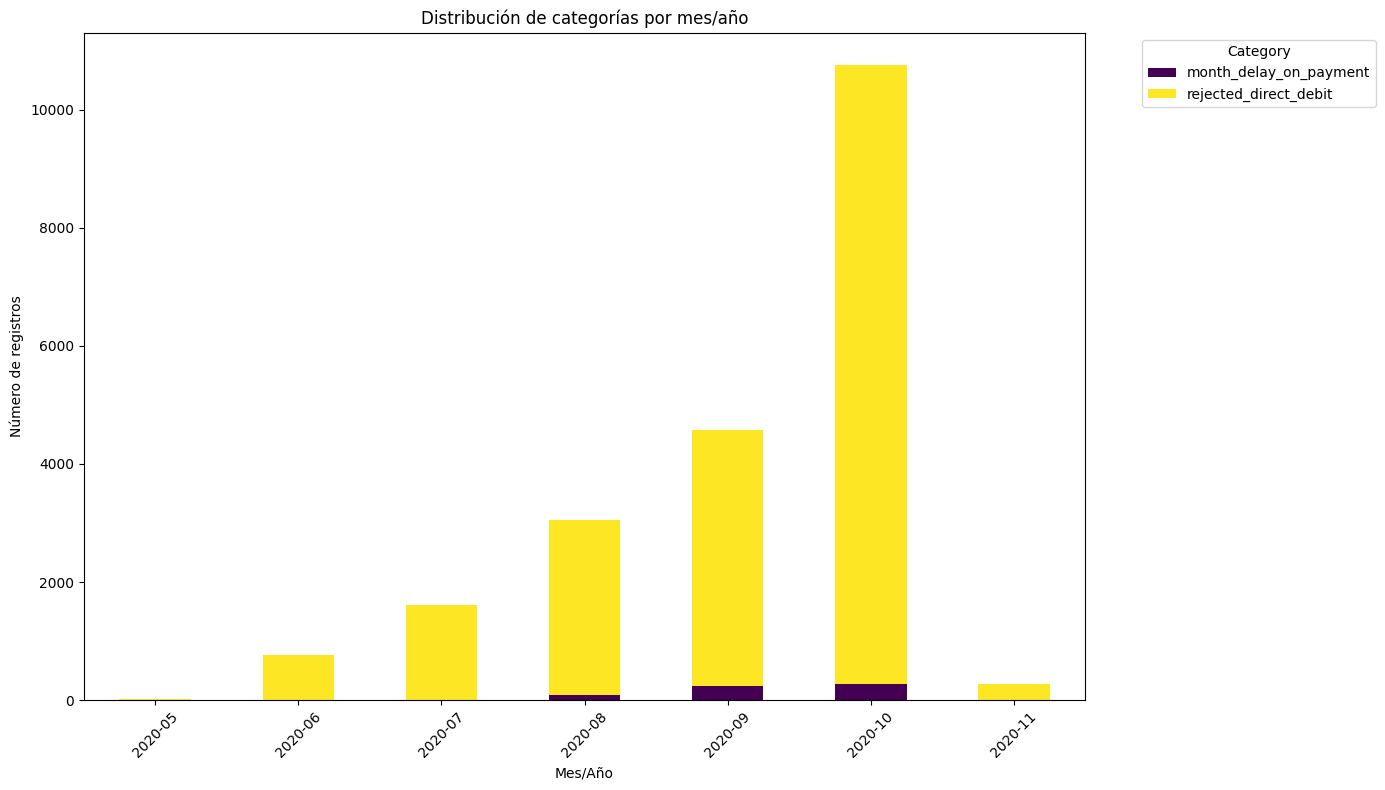

In [212]:

# Asegurarse de que `created_at` sea de tipo datetime
df_fees['created_at'] = pd.to_datetime(df_fees['created_at'], errors='coerce')

# Crear una nueva columna para el mes y año
df_fees['month_year'] = df_fees['created_at'].dt.to_period('M')

# Agrupar datos por `month_year` y `category` o `reason`
grouped = df_fees.groupby(['month_year', 'category']).size().unstack()

# Crear el gráfico de barras apiladas
grouped.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

# Configuración del gráfico
plt.title('Distribución de categorías por mes/año')
plt.xlabel('Mes/Año')
plt.ylabel('Número de registros')
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

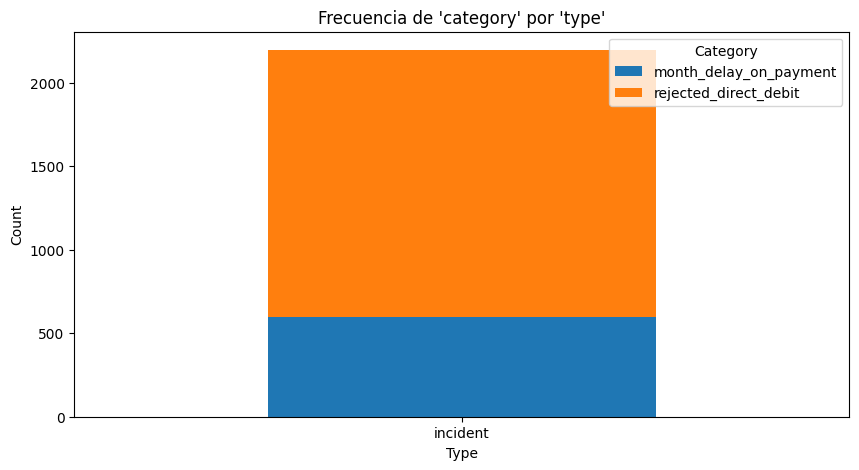

In [182]:
#Agrupar 'category' y 'type'
category_type_counts = df_fees.groupby(['type', 'category']).size().unstack(fill_value=0)

# Plot
category_type_counts.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title("Frecuencia de 'category' por 'type'")
plt.ylabel("Count")
plt.xlabel("Type")
plt.legend(title='Category')
plt.xticks(rotation=0)
plt.show()

Observaciones clave
Tipo de incidente:

Contiene una combinación de rejected_direct_debit y month_delay_payment.
Sin embargo, el rejected_direct_debit es más frecuente que el month_delay_payment.

pago_instantáneo y posponer Tipos:

Ambos están asociados exclusivamente con la categoría de rejected_direct_debit.
No hay casos de Month_delay_on_paid para estos tipos.

4. **Unicidad**  
   - Evaluación: ¿Qué tan únicos son los datos?
   - Métrica: Número de valores duplicados detectados.

In [183]:
fees_duplicates = df_fees.duplicated().sum()
print(f"Duplicados en Fees: {fees_duplicates}")


Duplicados en Fees: 0


5. **Validez**  
   - Evaluación: ¿Cumplen los datos con los valores permitidos?  
   - Métrica: Número de valores fuera de rango o inválidos. 

In [185]:
invalid_fees_amount = df_fees[df_fees['total_amount'] < 0]
print(f"Montos inválidos en Fees: {len(invalid_fees_amount)}")

Montos inválidos en Fees: 0


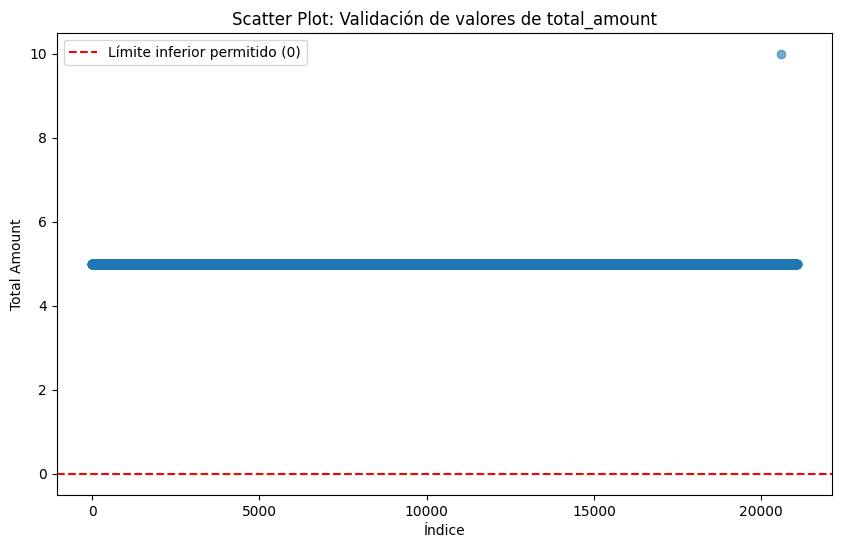

In [186]:
import matplotlib.pyplot as plt

# Scatter plot para `total_amount`
plt.figure(figsize=(10, 6))
plt.scatter(df_fees.index, df_fees['total_amount'], alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', label='Límite inferior permitido (0)')
plt.title('Scatter Plot: Validación de valores de total_amount')
plt.xlabel('Índice')
plt.ylabel('Total Amount')
plt.legend()
plt.show()


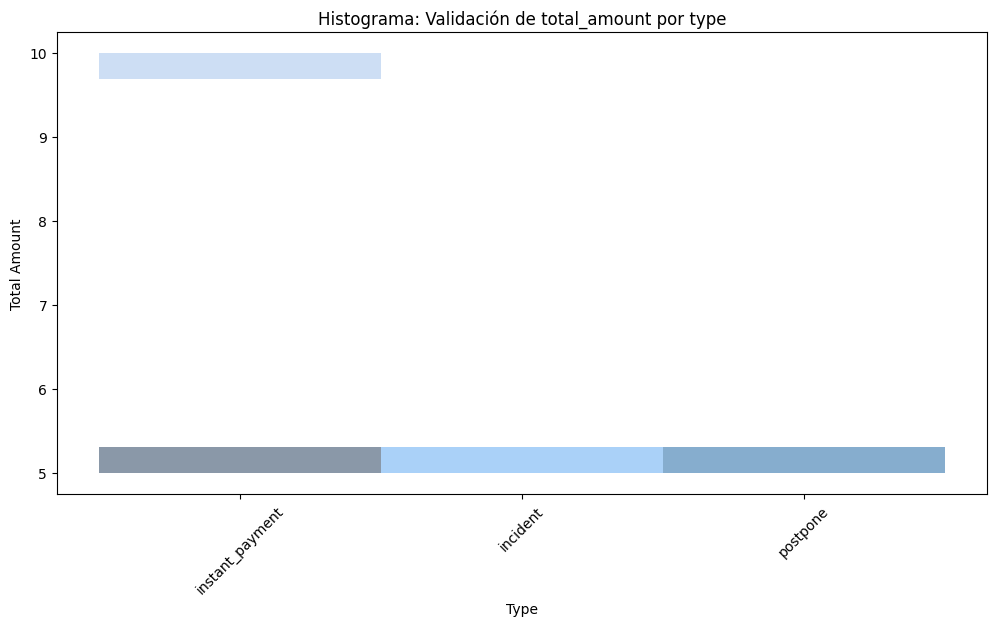

In [187]:
import seaborn as sns

# Scatter plot para `total_amount` agrupado por `type`
plt.figure(figsize=(12, 6))
sns.histplot(data=df_fees, x='type', y='total_amount', alpha=0.6)
plt.title('Histograma: Validación de total_amount por type')
plt.xlabel('Type')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

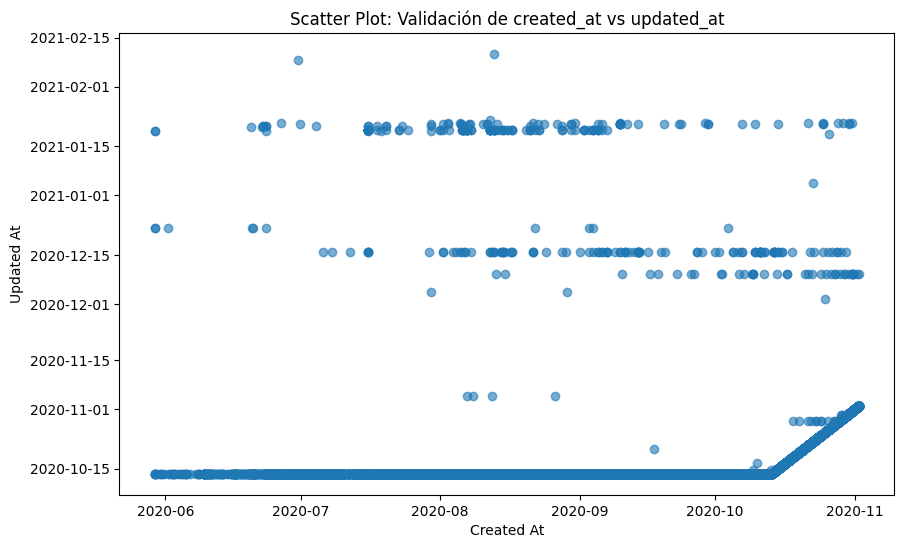

In [188]:
# Scatter plot para comparar `created_at` vs. `updated_at`
plt.figure(figsize=(10, 6))
plt.scatter(df_fees['created_at'], df_fees['updated_at'], alpha=0.6)
plt.title('Scatter Plot: Validación de created_at vs updated_at')
plt.xlabel('Created At')
plt.ylabel('Updated At')
plt.show()


In [189]:
# Ver valores únicos en variables categóricas
print(df_fees['type'].unique())
print(df_fees['category'].unique())

# Verificar distribución de valores
print(df_fees['total_amount'].describe())


['instant_payment' 'incident' 'postpone']
[nan 'rejected_direct_debit' 'month_delay_on_payment']
count    21061.000000
mean         5.000237
std          0.034453
min          5.000000
25%          5.000000
50%          5.000000
75%          5.000000
max         10.000000
Name: total_amount, dtype: float64



6. **Integridad estructural**  
   - Evaluación: Revisar el formato y estructura de los datos 
   - Métrica: Transformar el dataset para su uso en modelos personalizados.

**Completar datos faltantes:**

Lógica para la función imputar 'category'

El código tiene como objetivo imputar valores faltantes en la columna category basándose en la lógica definida según el valor de la columna type:

Si el valor en category es nulo (pd.isnull(row['category'])):

- Si type es 'instant_payment' o 'postpone', se asigna 'rejected_direct_debit' como valor imputado.
- Si type es 'incident', se asigna un valor basado en una probabilidad:
  - 80% de probabilidad de asignar 'rejected_direct_debit'.
  - 20% de probabilidad de asignar 'month_delay_on_payment'.
- Si el valor en category no es nulo, se mantiene el valor original.

In [190]:
# Función para imputar 'category'
def impute_category(row):
    if pd.isnull(row['category']):
        if row['type'] in ['instant_payment', 'postpone']:
            return 'rejected_direct_debit'
        elif row['type'] == 'incident':
            # Asignar en base a las proporciones
            return 'rejected_direct_debit' if np.random.rand() < 0.8 else 'month_delay_on_payment'
    return row['category']

# Aplicar la función al df
df_fees['category'] = df_fees.apply(impute_category, axis=1)
df_fees['category'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 21061 entries, 0 to 21060
Series name: category
Non-Null Count  Dtype 
--------------  ----- 
21061 non-null  object
dtypes: object(1)
memory usage: 164.7+ KB


Comprender las relaciones entre columnas from_date y to_date:

Estos están fuertemente correlacionados (correlación de 0,85).
- from_date siempre debe ser anterior a to_date.
- paid_at representa una fecha de pago. Normalmente debería ocurrir después de from_date y antes de to_date.

A continuación se usa neighbourhood e interpolación con el objetivo de completar los datos faltantes.

In [191]:
# Convertir 'from_date' y 'to_date' a numerico (timestamps)
df_fees['from_date_numeric'] = df_fees['from_date'].astype('int64')  # datetime a nanosegundos
df_fees['to_date_numeric'] = df_fees['to_date'].astype('int64')

# Interpolar los valores faltantes por columnas numericas
df_fees['from_date_numeric'] = df_fees['from_date_numeric'].interpolate(method='linear')
df_fees['to_date_numeric'] = df_fees['to_date_numeric'].interpolate(method='linear')

# Convertir de vuelta a fecha
df_fees['from_date'] = pd.to_datetime(df_fees['from_date_numeric'], unit='ns')
df_fees['to_date'] = pd.to_datetime(df_fees['to_date_numeric'], unit='ns')

# Eliminar las columnas numericas creadas
df_fees.drop(columns=['from_date_numeric', 'to_date_numeric'], inplace=True)

# Validar los resultados
print("Valores que siguen faltando en 'from_date':", df_fees['from_date'].isnull().sum())
print("Valores que siguen faltando en 'to_date':", df_fees['to_date'].isnull().sum())


Valores que siguen faltando en 'from_date': 14312
Valores que siguen faltando en 'to_date': 14549


Esta fue una primera prueba realizada, donde no funcionó la interpolación con valores vecinos, debido a los espacios que hay unos entre otros. Por eso quedaron tantos datos faltantes, y muchos otros como NAT. 

A continuación una prueba dos, donde se plantea la siguiente lógica:

- Si paid_at existe, from_date puede ser predeterminado en paid_at - X días.
- Si from_date existe pero to_date no, establezca to_date = from_date + default_duration.
- Completar los espacios restantes con valores medios o medianos de from_date y to_date para el conjunto de datos

In [192]:
# Calcular la duración media en dias entre  'from_date' y 'to_date' exist
df_fees['duration_days'] = (df_fees['to_date'] - df_fees['from_date']).dt.days
mean_duration_days = df_fees['duration_days'].mean()
mean_duration_days

np.float64(20.382323232323234)

In [193]:
# Convertir 'from_date' y 'to_date' a UTC (timezone-aware)
df_fees['from_date'] = pd.to_datetime(df_fees['from_date'], utc=True)
df_fees['to_date'] = pd.to_datetime(df_fees['to_date'], utc=True)

# Convertir 'from_date' y 'to_date' a timestamp numerico
median_from_date = pd.to_datetime(df_fees['from_date']).dropna().astype('int64').median()
median_to_date = pd.to_datetime(df_fees['to_date']).dropna().astype('int64').median()

# Convertir la media a datetime
median_from_date = pd.to_datetime(median_from_date, unit='ns')
median_to_date = pd.to_datetime(median_to_date, unit='ns')

# Completar faltantes 'from_date' y 'to_date' con sus respectivas medianas
df_fees['from_date'].fillna(median_from_date, inplace=True)
df_fees['to_date'].fillna(median_to_date, inplace=True)

# Validar resultados
print("Remaining missing values in 'from_date':", df_fees['from_date'].isnull().sum())
print("Remaining missing values in 'to_date':", df_fees['to_date'].isnull().sum())



Remaining missing values in 'from_date': 0
Remaining missing values in 'to_date': 0


/var/folders/5j/6t2j9zls237_klqhdt5ljdgr0000gn/T/ipykernel_79538/3282891768.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fees['from_date'].fillna(median_from_date, inplace=True)
/var/folders/5j/6t2j9zls237_klqhdt5ljdgr0000gn/T/ipykernel_79538/3282891768.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2020-09-25 23:51:00' has dtype incompatible with datetime64[ns, UTC], please explicitly cast to a compatible dtype first.
  df_fees

In [194]:
# Convertir 'from_date', 'to_date', y 'paid_at' a UTC timezone-aware
df_fees['from_date'] = pd.to_datetime(df_fees['from_date'], utc=True)
df_fees['to_date'] = pd.to_datetime(df_fees['to_date'], utc=True)
df_fees['paid_at'] = pd.to_datetime(df_fees['paid_at'], utc=True)

# Computar una fecha media para 'paid_at'
df_fees['paid_at'] = df_fees.apply(
    lambda row: row['from_date'] + (row['to_date'] - row['from_date']) / 2
    if pd.isnull(row['paid_at']) else row['paid_at'], axis=1
)

# Validate the results
print("Remaining missing values in 'paid_at':", df_fees['paid_at'].isnull().sum())


Remaining missing values in 'paid_at': 0


In [195]:
# Validar inconsistencias en el tiempo
df_fees['valid_dates'] = (df_fees['from_date'] <= df_fees['paid_at']) & (df_fees['paid_at'] <= df_fees['to_date'])

# Identificar filas inconsistentes
invalid_rows = df_fees[~df_fees['valid_dates']]
print(f"Numero de filas con fechas inconsistentes: {len(invalid_rows)}")

#Mostrar las filas no válidas
if not invalid_rows.empty:
    print(invalid_rows[['from_date', 'paid_at', 'to_date']])



Numero de filas con fechas inconsistentes: 12267
                      from_date                          paid_at  \
0     2020-09-25 23:51:00+00:00 2020-12-17 14:50:07.470110+00:00   
1     2020-09-25 23:51:00+00:00 2020-12-08 17:13:10.459080+00:00   
2     2020-09-25 23:51:00+00:00 2020-11-04 19:34:37.432910+00:00   
3     2020-09-25 23:51:00+00:00 2020-11-19 05:09:22.500223+00:00   
4     2020-09-25 23:51:00+00:00 2020-11-02 14:45:20.355598+00:00   
...                         ...                              ...   
21056 2020-09-25 23:51:00+00:00 2020-11-17 05:14:00.080854+00:00   
21057 2020-09-25 23:51:00+00:00 2020-12-16 07:10:54.697639+00:00   
21058 2020-09-25 23:51:00+00:00 2020-11-18 04:35:42.915511+00:00   
21059 2020-09-25 23:51:00+00:00 2020-12-18 05:18:01.465317+00:00   
21060 2020-09-25 23:51:00+00:00 2021-02-12 13:02:46.950220+00:00   

                        to_date  
0     2020-10-29 11:00:00+00:00  
1     2020-10-29 11:00:00+00:00  
2     2020-10-29 11:00:00+00:00 

In [196]:
# Ajustar filas válidas
df_fees.loc[~df_fees['valid_dates'], 'paid_at'] = df_fees.loc[~df_fees['valid_dates'], 'from_date'] + \
                                                  (df_fees.loc[~df_fees['valid_dates'], 'to_date'] - df_fees.loc[~df_fees['valid_dates'], 'from_date']) / 2

# Re-validar
df_fees['valid_dates'] = (df_fees['from_date'] <= df_fees['paid_at']) & (df_fees['paid_at'] <= df_fees['to_date'])
print(f"Numero de filas con fechas inválidas después de arreglarlo: {len(df_fees[~df_fees['valid_dates']])}")


Numero de filas con fechas inválidas después de arreglarlo: 52


In [198]:
# Computar duraciones
df_fees['duration_days'] = (df_fees['to_date'] - df_fees['from_date']).dt.days
df_fees['time_to_payment_days'] = (df_fees['paid_at'] - df_fees['from_date']).dt.days

# Mostrar resumen estadistico
print("Summary of durations:")
print(df_fees['duration_days'].describe())

print("Summary of time to payment:")
print(df_fees['time_to_payment_days'].describe())


Summary of durations:
count    21061.000000
mean        31.433977
std         15.273427
min        -87.000000
25%         30.000000
50%         33.000000
75%         33.000000
max        154.000000
Name: duration_days, dtype: float64
Summary of time to payment:
count    21061.000000
mean        15.030625
std          8.362607
min        -44.000000
25%         14.000000
50%         16.000000
75%         16.000000
max         77.000000
Name: time_to_payment_days, dtype: float64


In [200]:
# Identificar las filas con valores negativos en duration_days
negative_durations = df_fees[df_fees['duration_days'] < 0]
print(f"Numero de filas con valores negativos en duration_days: {len(negative_durations)}")

# Ajustar las duraciones negativas tomando 'to_date' a 'from_date' + mean_duration_days
df_fees.loc[df_fees['duration_days'] < 0, 'to_date'] = \
    df_fees.loc[df_fees['duration_days'] < 0, 'from_date'] + pd.Timedelta(days=mean_duration_days)

# Recomputar duraciones
df_fees['duration_days'] = (df_fees['to_date'] - df_fees['from_date']).dt.days

# Validar el ajuste
print("Valores negativos después del ajuste:", len(df_fees[df_fees['duration_days'] < 0]))


Numero de filas con valores negativos en duration_days: 52
Valores negativos después del ajuste: 0


In [201]:
# Identificar las filas con valor negativo en time_to_payment_days
negative_time_to_payment = df_fees[df_fees['time_to_payment_days'] < 0]
print(f"Número de filas con valor negativo en time_to_payment_days: {len(negative_time_to_payment)}")

# Ajustar los valores negativos de 'paid_at' tomando un punto meido entre'from_date' y 'to_date'
df_fees.loc[df_fees['time_to_payment_days'] < 0, 'paid_at'] = \
    df_fees.loc[df_fees['time_to_payment_days'] < 0, 'from_date'] + \
    (df_fees.loc[df_fees['time_to_payment_days'] < 0, 'to_date'] - df_fees.loc[df_fees['time_to_payment_days'] < 0, 'from_date']) / 2

# Recomputar el tiempo de pago
df_fees['time_to_payment_days'] = (df_fees['paid_at'] - df_fees['from_date']).dt.days

# Validar el ajuste
print("Valores negativos después del ajuste:", len(df_fees[df_fees['time_to_payment_days'] < 0]))


Número de filas con valor negativo en time_to_payment_days: 52
Valores negativos después del ajuste: 0


In [202]:
# Validar relaciones temporales
df_fees['valid_dates'] = (df_fees['from_date'] <= df_fees['paid_at']) & (df_fees['paid_at'] <= df_fees['to_date'])
invalid_rows = df_fees[~df_fees['valid_dates']]
print(f"Filas con relaciones temporales: {len(invalid_rows)}")

Filas con relaciones temporales: 0


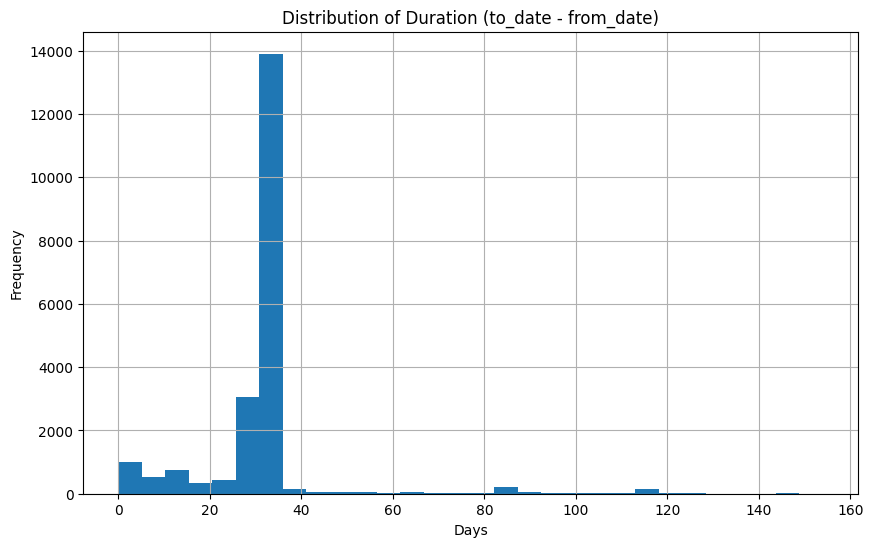

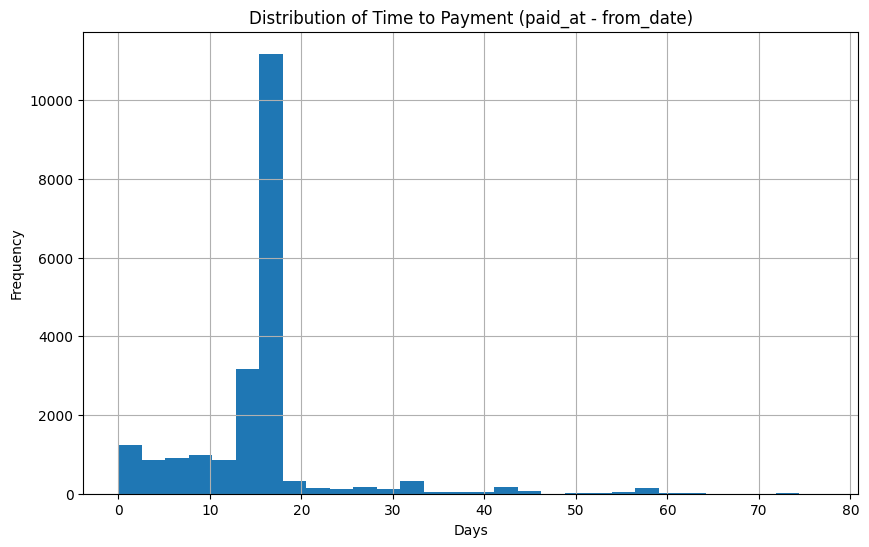

In [218]:
import matplotlib.pyplot as plt

# Histograma de duraciones
plt.figure(figsize=(10, 6))
df_fees['duration_days'].hist(bins=30)
plt.title("Distribution of Duration (to_date - from_date)")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

# Histograma de los tiempos de pago
plt.figure(figsize=(10, 6))
df_fees['time_to_payment_days'].hist(bins=30)
plt.title("Distribution of Time to Payment (paid_at - from_date)")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

**Analisis de la variable 'reason'**

In [203]:
df_fees.nunique()

id                      21061
cash_request_id         12933
type                        3
status                      4
category                    2
total_amount                2
reason                  15149
created_at              21026
updated_at              21061
paid_at                  4378
from_date                 454
to_date                   483
charge_moment               2
cohort                      7
duration_days             133
valid_dates                 1
time_to_payment_days       70
dtype: int64

In [204]:
df_fees['reason']

0        Instant Payment Cash Request 14941
1                     rejected direct debit
2        Instant Payment Cash Request 23371
3        Instant Payment Cash Request 26772
4        Instant Payment Cash Request 19350
                        ...                
21056    Instant Payment Cash Request 20262
21057    Instant Payment Cash Request 26764
21058    Instant Payment Cash Request 25331
21059    Instant Payment Cash Request 23628
21060    Instant Payment Cash Request 20982
Name: reason, Length: 21061, dtype: object

In [205]:
# Extraer el ID (números al final de la cadena)
df_fees['reason_id'] = df_fees['reason'].str.extract(r'(\d+)$')

# Reemplazar NaN con 0 en reason_id
df_fees['reason_id'] = df_fees['reason_id'].fillna(0).astype(int)

# Limpiar la columna reason para eliminar el ID
df_fees['reason'] = df_fees['reason'].str.replace(r'\d+$', '', regex=True).str.strip()

In [206]:
df_fees['reason'].unique()

array(['Instant Payment Cash Request', 'rejected direct debit',
       'Postpone Cash Request', 'month delay on payment - 10/',
       'month delay on payment - 9/', 'month delay on payment - 8/',
       'month delay on payment - 11/', 'month delay on payment - 7/'],
      dtype=object)

**Convertir las variables categóricas en versiones numéricas**

In [207]:
# Convertir 'type',`status`y 'category' en variable numéricas (Label Encoding)
fees_type_mapping = {
    'instant_payment':0,
    'incident':1, 
    'postpone':2
}

fees_status_mapping = {
    'rejected':0,
    'accepted':1, 
    'cancelled':2,
    'confirmed':3
}

fees_category_mapping = {
    'rejected_direct_debit':0,
    'month_delay_on_payment':1, 
    'nan':2
}

fees_reason_mapping = {
    'Instant Payment Cash Request':0,
    'rejected direct debit':1, 
    'Postpone Cash Request':2,
    'month delay on payment - /7':7,
    'month delay on payment - /8':8,
    'month delay on payment - /9':9,
    'month delay on payment - /10':10,
    'month delay on payment - /11':11
}


# Aplicar el mapping a las columnas
df_fees['type_encoded'] = df_fees['type'].map(fees_type_mapping)
df_fees['status_encoded'] = df_fees['status'].map(fees_status_mapping)
df_fees['category_encoded'] = df_fees['category'].map(fees_category_mapping)
df_fees['reason_encoded'] = df_fees['reason'].map(fees_reason_mapping)

In [208]:
df_fees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   id                    21061 non-null  int64              
 1   cash_request_id       21057 non-null  float64            
 2   type                  21061 non-null  object             
 3   status                21061 non-null  object             
 4   category              21061 non-null  object             
 5   total_amount          21061 non-null  float64            
 6   reason                21061 non-null  object             
 7   created_at            21061 non-null  datetime64[ns, UTC]
 8   updated_at            21061 non-null  datetime64[ns, UTC]
 9   paid_at               21061 non-null  datetime64[ns, UTC]
 10  from_date             21061 non-null  datetime64[ns, UTC]
 11  to_date               21061 non-null  datetime64[ns, UTC]
 12  char

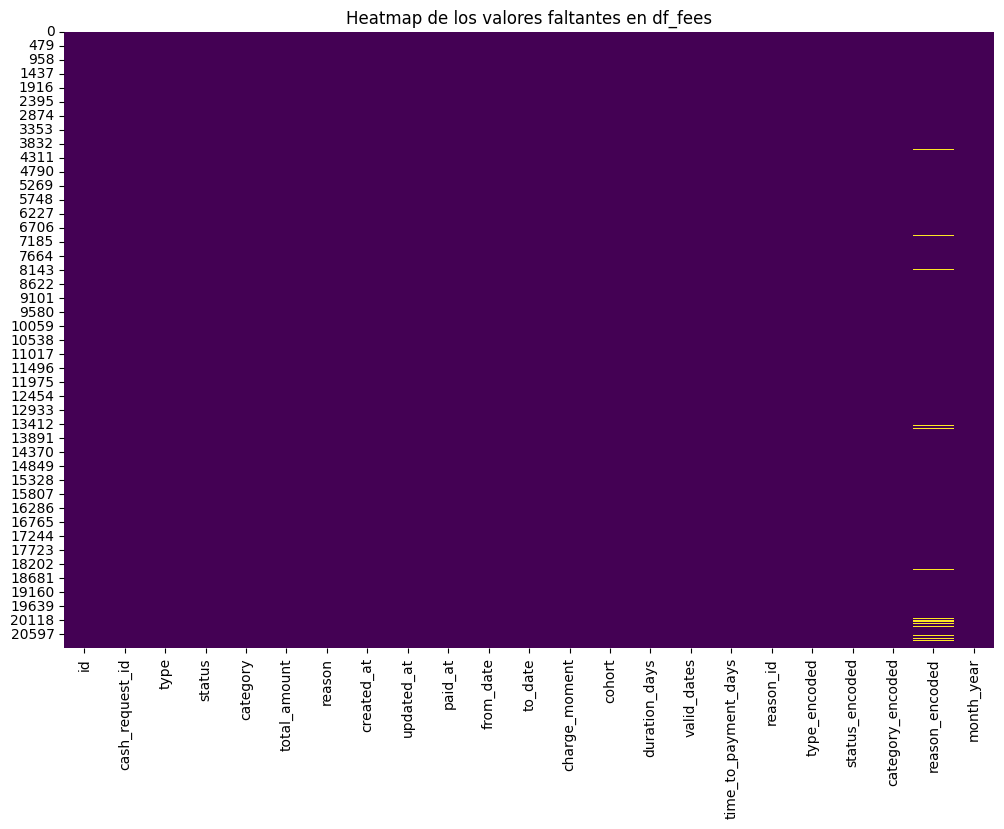

In [217]:
# Heatmap de valores faltantes
plt.figure(figsize=(12, 8))
sns.heatmap(df_fees.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap de los valores faltantes en df_fees")
plt.show()

In [209]:
#Guardar 'fees_new' como 'fees_new.csv'
fees_new = df_fees

fees_new.to_csv('fees-new.csv', index=False)
print("Los datos limpios han sido guardados como 'fees_new.csv'")

Los datos limpios han sido guardados como 'fees_new.csv'
